<a href="https://colab.research.google.com/github/woukl22/MachineLearningStudy_PythonMachineLearning3rdEd/blob/main/Chapter3/3.6_Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.6 결정 트리 학습

결정 트리(decision tree) 분류기는 **설명이 중요할 때 유용한 모델**이다.<br>
일련의 질문에 대한 **결정을 통해 데이터를 분해하는 모델**이다.<br>
훈련 데이터에 있는 **특성을 기반**으로 샘플의 **클래스 레이블을 추정할 수 있는 일련의 질문을 학습**한다.<br>
예를 들어 꽃받침 너비 특성 축에 **기준 값을 정하고** "꽃받침 너비가 2.8cm보다 큰가요?" 라는 **예/아니요 질문**을 할 수 있다.<br><br>
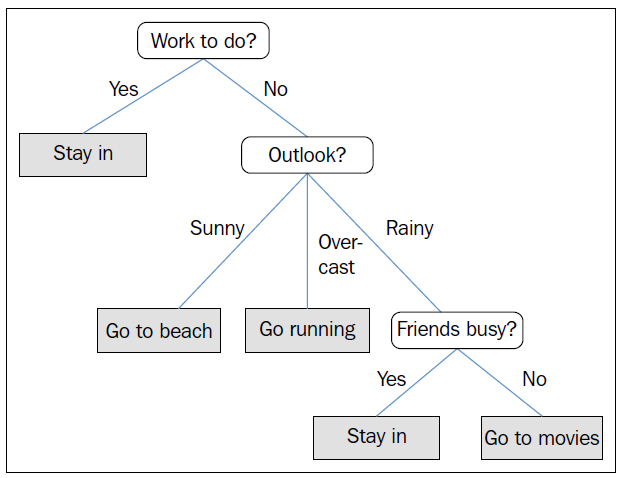



**결정 알고리즘**을 사용하면 트리의 루트(root)에서 시작해서 **정보 이득(Information Gain, IG)**이 **최대**가 되는 특성으로 **데이터를 나눈다**.<br><br>
리프 노드(leaf node)가 **순수**해질 때까지 **모든 자식 노드에서 분할 작업을 반복**한다.<br>
이렇게 **순수 노드**가 될 때까지 진행하면 **모델이 복잡**해지고 **훈련 데이터에 과대적합**된다.<br>
**순수 노드로 이루어진 트리**는 훈련 데이터셋에 **100% 맞는다**는 의미이다.<br>
일반적으로 **트리의 최대 깊이를 제한**하여 트리를 **가지치기(pruning)**한다.<br>


# 3.6.1 정보 이득 최대화: 자원을 최대로 활용

### 정보 이득 = 부모 노드의 불순도 - 자식 노드의 불순도의 합<br>
자식 노드의 **불순도가 낮을수록** 정보 이득이 **커진다**.<br><br>

이진 결정 트리에 널리 사용되는 세 개의 **불순도 지표** 또는 분할 조건은 **지니 불순도**(Gini impuity), **엔트로피**(entropy), **분류 오차**(classification error)이다.<br>
(대부분의 라이브러리는 이진 결정 트리를 사용한다.)<br><br>

#### **엔트로피**(Entropy):
한 노드의 모든 샘플이 같은 클래스이면 **엔트로피는 0**이 된다.<br>
클래스 **분포가 균등하면 최대**가 된다.<br>
**p(i=1|t)=1** 또는 **p(i=0|t)=0** 이면 **엔트로피는 0**이다.<br>
**p(i=1|t)=0.5**와 **p(i=0|t)=0.5**처럼 균등하게 분포되어 있으면 **엔트로피는 1**이 된다.<br><br>

#### **지니 불순도**(Gini Impurity):
클래스가 **완벽하게 섞여 있을 때 최대**가 된다.<br>
지니 불순도와 엔트로피는 비슷한 결과가 나온다.<br><br>

#### **분류 오차**(Classification Error):
**가지치기에는 좋은 기준**이지만 노드의 클래스 **확률 변화에 덜 민감**하기 때문에 결정 트리를 구성하는 데는 **권장하지 않는다**.<br><br>

#### - **불순도 지표 비교 그래프**

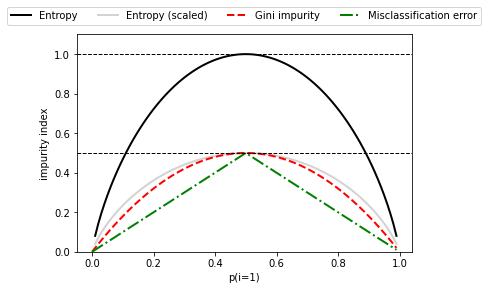

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
  return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
  return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)',
                           'Gini impurity',
                           'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
  line = ax.plot(x, i, label=lab, 
                 linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

# 3.6.2 결정 트리 만들기

결정 트리가 **깊어질수록** 결정 경계가 **복잡**해지고 **과대적합** 되기 쉽기 때문에 주의해야 한다.<br><br>

#### - **결정 트리가 학습한 붓꽃 데이터셋의 결정 경계**

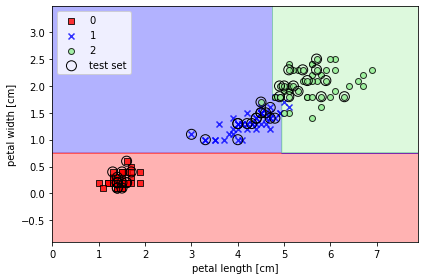

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                              random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined,
                     y_combined,
                     classifier=tree,
                     test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 3.6.3 랜덤 포레스트로 여러 개의 결정 트리 연결

**랜덤 포레스트(random forest)** 알고리즘은 결정 트리 기반의 확장성이 좋고 사용하기 쉬운 앙상블 방법이다.<br>
여러 개의 (깊은) 결정 트리를 평균 내는 것이다.<br>
개개의 트리는 분산이 높은 문제가 있지만 앙상블은 견고한 모델을 만들어 일반화 성능을 높이고 과대적합의 위험을 줄인다.<br><br>

### **랜덤 포레스트 알고리즘 4단계 요약**
1. n개의 랜덤한 부트스트랩(bootstrap) 샘플을 뽑는다. (훈련 데이터셋에서 중복을 허용하면서 랜덤하게 n개의 샘플을 선택한다.)

2. 부트스트랩 샘플에서 결정 트리를 학습한다. 각 노드에서 다음과 같이 한다.<br>
    a. 중복을 허용하지 않고 랜덤하게 d개의 특성을 선택한다.<br>
    b. 정보 이득과 같은 목적 함수를 기준으로 최선의 분할을 만드는 특성을 사용해서 노드를 분할한다. (모든 특성을 평가하는 것이 아니라 랜덤하게 선택된 일부 특성만 사용한다.)

3. 단계 1~2를 k번 반복한다.

4. 각 트리의 예측을 모아 다수결 투표(majority voting)로 클래스 레이블을 할당한다.<br><br>

**랜덤 포레스트**는 결정 트리만큼 해석이 쉽지는 않지만 **하이퍼파라미터 튜닝**에 많은 **노력을 기울이지 않아도 되는 것**이 **큰 장점**이다.<br>
랜덤 포레스트는 **가지치기를 할 필요가 없다**.<br>
실전에서 신경 써야 할 파라미터는 **3단계**의 랜덤 포레스트가 만들 **트리 개수** 뿐이다.<br>
**트리 개수가 많을수록** 계산 **비용이 증가**하는 만큼 랜덤 포레스트 분류기의 **성능이 좋아진다**.<br><br>

### 자주 사용되지는 않지만 최적화할 만한 다른 하이퍼파라미터 두 가지
1. 1 단계의 **부트스트랩 샘플의 크기 n**: 랜덤 포레스트의 편향-분산 트레이드오프를 조절할 수 있다.

2. 2-a 단계의 **각 분할에서 무작위로 선택할 특성 개수 d**

<br>

**부트스트랩 샘플 크기가 작아지면:**<br>
특정 훈련 샘플이 부트스트랩 샘플에 포함될 확률이 낮기 때문에 **개별 트리의 다양성이 증가**한다.<br>
무작위성이 증가하고 **과대적합의 영향이 줄어**든다.<br>
훈련 성능과 테스트 성능 사이에 격차가 작아지지만 **전체적인 테스트 성능이 감소**한다.<br><br>

**부트스트랩 샘플 크기가 커지면:**<br>
부트스트랩 샘플과 개별 결정 트리가 서로 비슷해지기 때문에 원본 훈련 데이터셋에 더 가깝게 학습되어 **과대적합 가능성이 늘어난다**.<br><br><br>

사이킷런의 RandomForestClassifier를 포함한 대부분의 라이브러리에서는 **부트스트랩 샘플 크기를 원본 훈련 데이터셋의 샘플 개수와 동일하게 한다.**<br>
이렇게 하면 **균형 잡힌 편향-분산 트레이드오프**를 얻을 수 있다.<br>
**분할에 사용할 특성 개수 d**는 훈련 데이터셋에 있는 **전체 특성 개수보다 작게 지정하는 편**이다.<br>
사이킷런과 다른 라이브러리에서 사용하는 적당한 **기본값**은 **d = sqrt(m)**이며, 이때 **m은 훈련 데이터셋에 있는 특성 개수**이다.<br><br>

#### - **랜덤 포레스트가 학습한 붓꽃 데이터셋의 결정 경계**

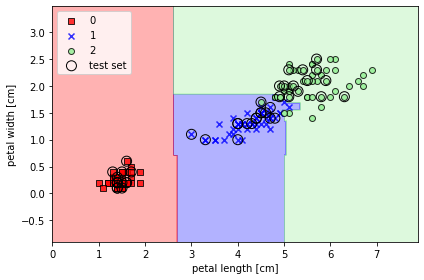

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',   # 불순도 지표로 '지니 불순도'를 사용함
                                n_estimators=25,    # 25개의 결정트리를 사용하여 랜덤 포레스트 훈련
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()